In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [62]:
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/irisdata.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/irisdata.csv")

In [63]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   s_length  150 non-null    float64
 1   s_width   150 non-null    float64
 2   p_length  150 non-null    float64
 3   p_width   150 non-null    float64
 4   class     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,s_length,s_width,p_length,p_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [64]:
#Frequency distribution of class"
iris_outcome = pd.crosstab(index=iris["class"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [65]:
iris_setosa=iris.loc[iris["class"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["class"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["class"]=="Iris-versicolor"]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

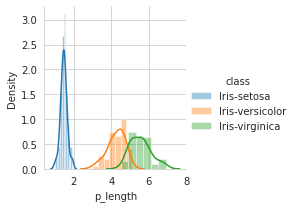

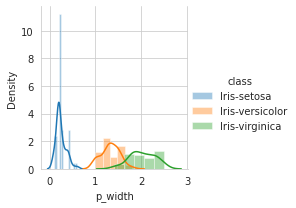

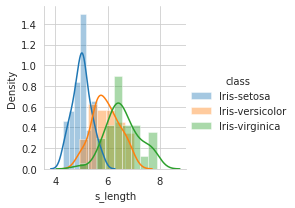

In [66]:
sns.FacetGrid(iris,hue="class",size=3).map(sns.distplot,"p_length").add_legend()
sns.FacetGrid(iris,hue="class",size=3).map(sns.distplot,"p_width").add_legend()
sns.FacetGrid(iris,hue="class",size=3).map(sns.distplot,"s_length").add_legend()
plt.show()

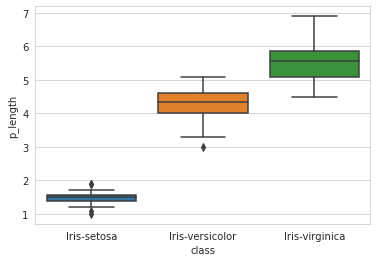

In [67]:
sns.boxplot(x="class",y="p_length",data=iris)
plt.show()

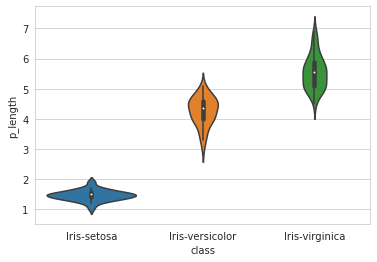

In [68]:
sns.violinplot(x="class",y="p_length",data=iris)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


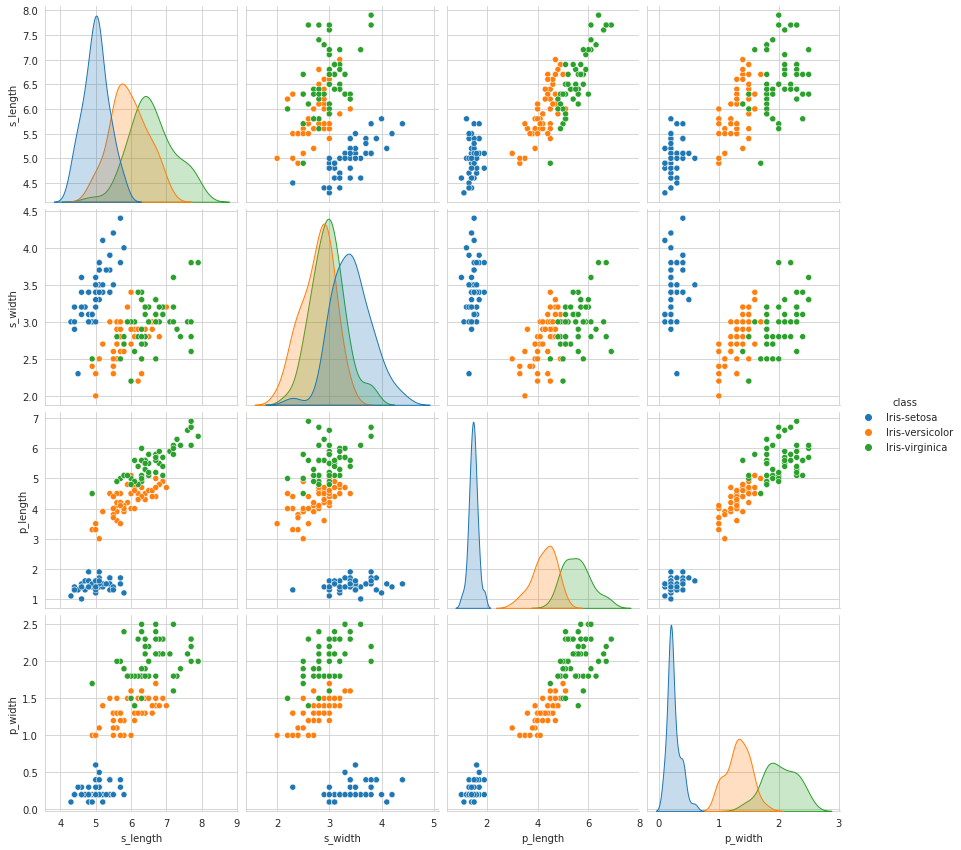

In [69]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="class",size=3);
plt.show()

## K-Means

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [70]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


Using the elbow method to determine the optimal number of clusters for k-means clustering

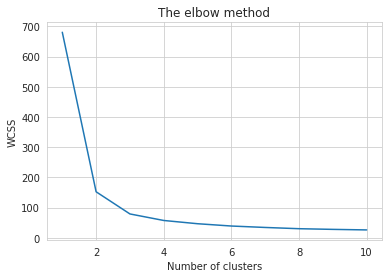

In [71]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Implementing K-Means Clustering

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

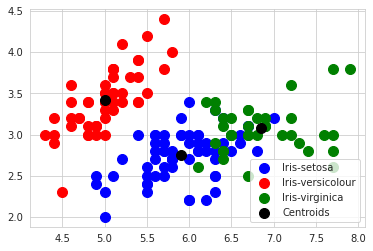

In [73]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

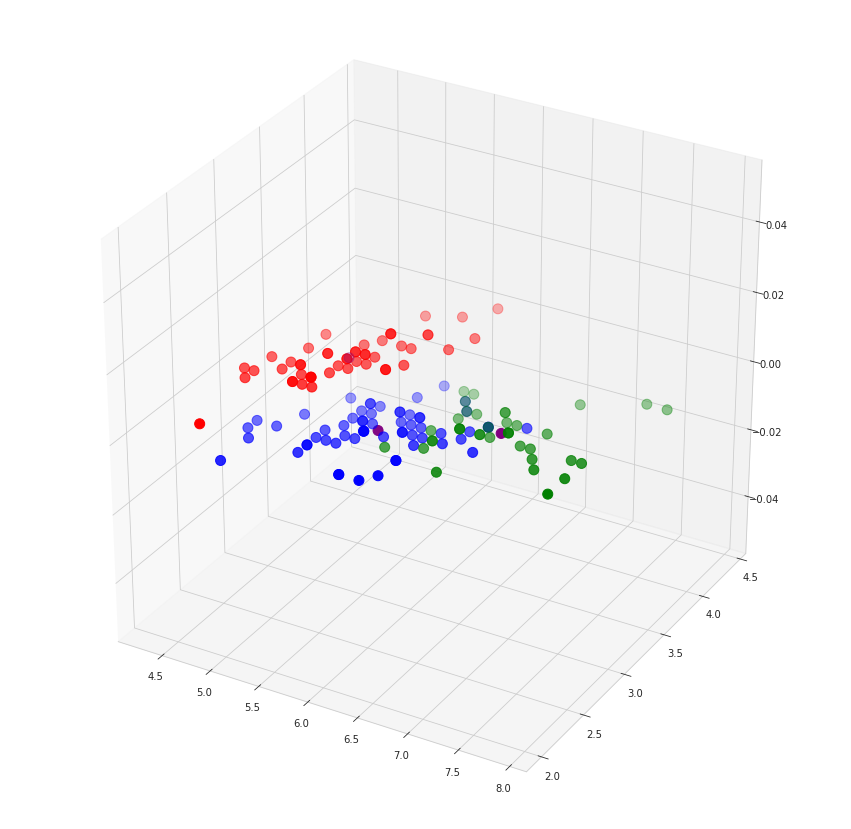

In [74]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')
plt.show()

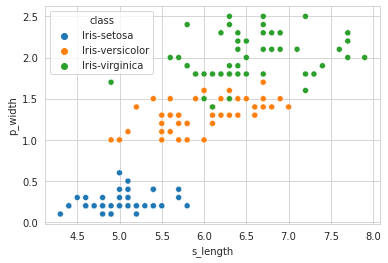

In [75]:
sns.scatterplot(data=df, x='s_length', y='p_width', hue='class')

In [76]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.4)

X = train[['s_length', 'p_width']].to_numpy()
y = train[['class']].to_numpy()

In [77]:
k = 3
model = KMeans(n_clusters=k)
model.fit_predict(X, y)

array([0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2,
       0, 0], dtype=int32)

In [83]:
s = model.score(X,y)
print(s)

-12.431464181286547


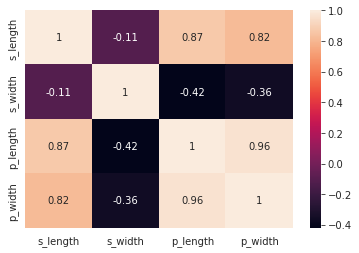

In [80]:
#finding correlation of features 
correl=df.corr()
sns.heatmap(correl,annot=True)

In [81]:
#checking for Null values
df.isnull().sum()

s_length    0
s_width     0
p_length    0
p_width     0
class       0
dtype: int64

In [85]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [86]:
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [87]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

In [92]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

9.821428571428571
94.73684210526315


In [91]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.10       112
   macro avg       0.33      0.31      0.32       112
weighted avg       0.11      0.10      0.10       112

